# **1. Perkenalan Dataset**


Breast cancer merupakan salah satu penyakit dengan tingkat kematian yang cukup tinggi, sehingga diperlukan sistem pendukung keputusan untuk membantu proses diagnosis secara dini.

Pada eksperimen ini digunakan dataset **Breast Cancer Wisconsin (Diagnostic)** yang diperoleh dari Kaggle. Dataset ini berisi data hasil pemeriksaan sel tumor payudara yang digunakan untuk mengklasifikasikan tumor menjadi **jinak (benign)** atau **ganas (malignant)**.

**Informasi Dataset:**
- Sumber: Kaggle (UCI Machine Learning Repository)
- Jumlah data: 569 baris
- Jumlah fitur: 30 fitur numerik
- Target: `diagnosis`
  - M = Malignant
  - B = Benign
- Jenis masalah: Klasifikasi biner



# **2. Import Library**

Pada tahap ini dilakukan impor beberapa pustaka Python yang digunakan untuk
analisis data, visualisasi, serta pembangunan dan evaluasi model machine learning.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.sparse as sp
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

pd.set_option("display.max_columns", None)
sns.set(style="whitegrid")


# **3. Memuat Dataset**

Pada tahap ini, dataset dimuat ke dalam notebook untuk dilakukan analisis dan
pemodelan lebih lanjut. Dataset dalam format CSV dibaca menggunakan pustaka
`pandas`. Setelah dataset berhasil dimuat, dilakukan pengecekan beberapa baris
awal data untuk memahami struktur dan memastikan data telah dimuat dengan benar.

In [ ]:
df = pd.read_csv("breast_cancer.csv")
df.columns


Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [ ]:
df.shape

(569, 33)

# **4. Exploratory Data Analysis (EDA)**

Exploratory Data Analysis (EDA) dilakukan untuk memahami karakteristik dataset
secara menyeluruh. Tahap ini bertujuan untuk memperoleh wawasan awal mengenai
pola, distribusi, hubungan antar fitur, serta potensi permasalahan pada data
seperti missing values dan outlier. Hasil dari EDA digunakan sebagai dasar dalam
menentukan langkah selanjutnya pada proses analisis dan pemodelan.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df.isna().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [ ]:
df["diagnosis"].value_counts()


,count
diagnosis,
B,357
M,212


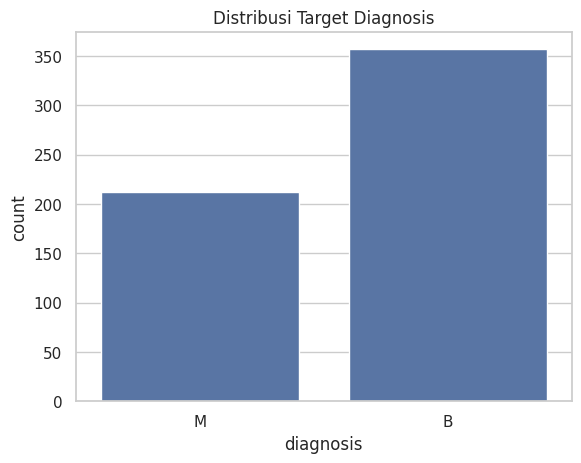

In [ ]:
sns.countplot(x="diagnosis", data=df)
plt.title("Distribusi Target Diagnosis")
plt.show()


In [ ]:
df.describe()


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


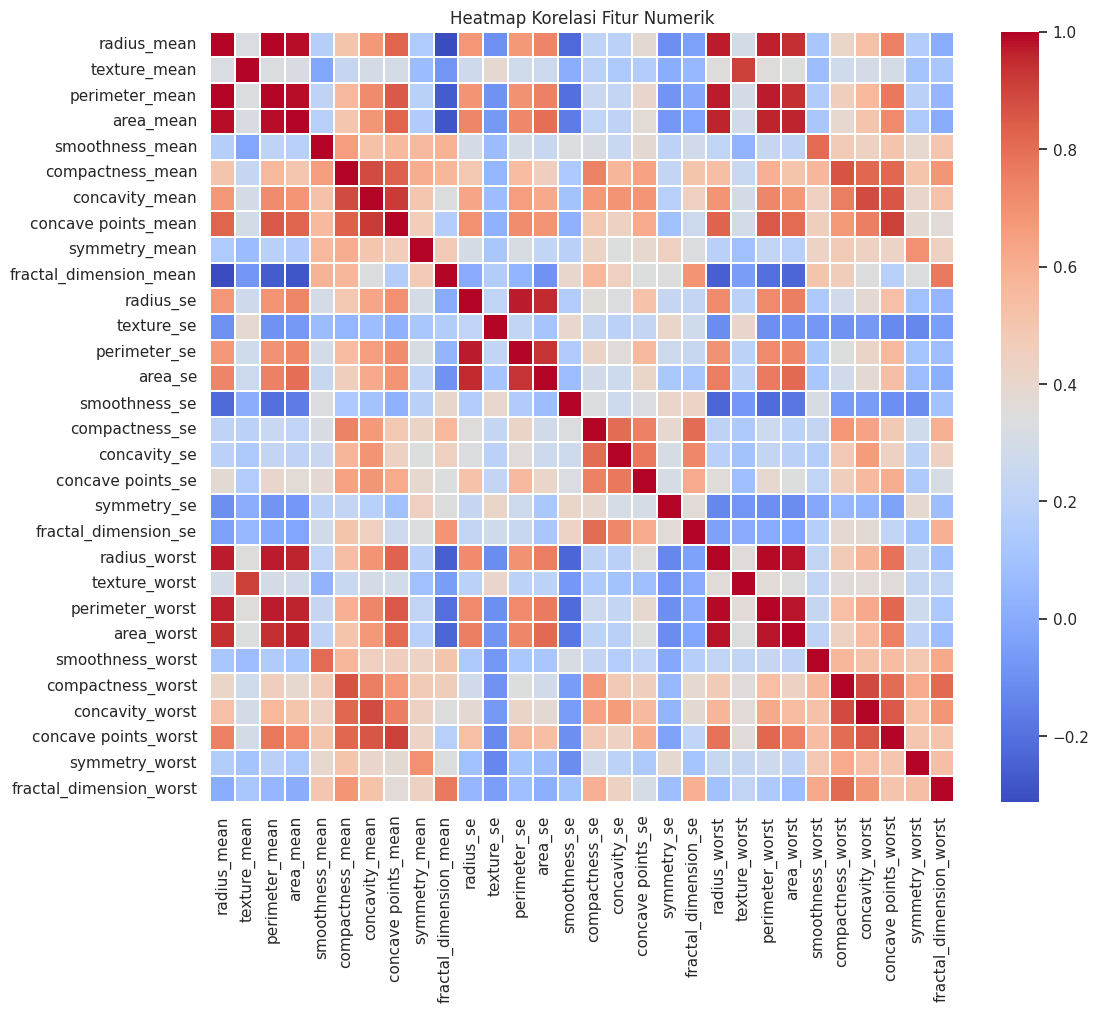

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(
    df.drop(columns=["id", "Unnamed: 32", "diagnosis"], errors="ignore").corr(),
    cmap="coolwarm",
    linewidths=0.3
)
plt.title("Heatmap Korelasi Fitur Numerik")
plt.show()


# **5. Data Preprocessing**

Data preprocessing merupakan tahap penting untuk memastikan kualitas data sebelum
digunakan dalam pembangunan model machine learning. Data mentah sering kali
mengandung nilai kosong, duplikasi, rentang nilai yang tidak konsisten, serta noise
yang dapat memengaruhi kinerja model.

Oleh karena itu, tahap ini bertujuan untuk membersihkan dan mempersiapkan data agar
proses analisis dan pemodelan dapat berjalan secara optimal. Teknik preprocessing
yang diterapkan disesuaikan dengan karakteristik data yang digunakan, khususnya
pada data tidak terstruktur seperti teks.

In [ ]:
# Menghapus kolom yang tidak relevan
df = df.drop(columns=["id", "Unnamed: 32"])

# Encoding target
df["diagnosis"] = df["diagnosis"].map({"M": 1, "B": 0})

# Validasi target
assert df["diagnosis"].isna().sum() == 0

# Memisahkan fitur dan target
X = df.drop(columns=["diagnosis"])
y = df["diagnosis"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)




In [ ]:
output_dir = "preprocessing/breast_cancer_preprocessing"
os.makedirs(output_dir, exist_ok=True)

# Simpan X_train dan X_test
pd.DataFrame(
    X_train_scaled,
    columns=X.columns
).to_csv(f"{output_dir}/X_train.csv", index=False)

pd.DataFrame(
    X_test_scaled,
    columns=X.columns
).to_csv(f"{output_dir}/X_test.csv", index=False)

# Simpan y_train dan y_test
y_train.to_csv(f"{output_dir}/y_train.csv", index=False)
y_test.to_csv(f"{output_dir}/y_test.csv", index=False)

print("Preprocessing selesai. File disimpan di:", output_dir)

Preprocessing selesai. File disimpan di: preprocessing/breast_cancer_preprocessing
